# Khadija Amin

# LGMVIP Task7-Advanced level: Neural Network that can read Handwriting

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

# MNIST Dataset Training and Testing Using Tensorflow

# Step 1. Loading MNIST Dataset from Keras

In [2]:
from tensorflow.keras.datasets import mnist
(train_x , train_y) , (test_x , test_y) = mnist.load_data()

In [3]:
train_x.shape

(60000, 28, 28)

In [4]:
train_y.shape

(60000,)

In [5]:
train_x[0].shape

(28, 28)

In [6]:
train_y[0]

5

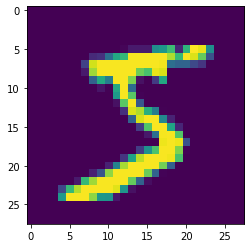

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0])

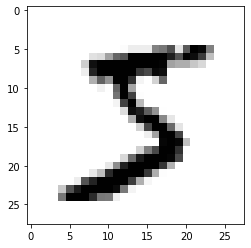

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0], cmap = plt.cm.binary)

# Step 2:Layer Architecture

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dense(512 , input_dim=784 , activation = 'relu' ,)) #input_shape = (28 , 28)))
network.add(layers.Dense(10 , activation = 'softmax'))

# Step 3:Network Compilation

In [11]:
network.compile(optimizer = 'rmsprop',
loss = 'categorical_crossentropy',
metrics = ['accuracy'])

In [12]:
network.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001E3CE350FA0>>

# Data Preprocessing!              Reshaping, Normalization, Label Encoding

In [13]:
# from sklearn.preprocessing import minmax_scale
train_x = train_x.reshape(60000,28*28) #Reshaping
train_x = train_x.astype('float32') / 255 #Normalizing
test_x = test_x.reshape(10000,28*28) #Reshaping
test_x = test_x.astype('float32') / 255 #Normalizing

In [14]:
#Label Encoding
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y , num_classes=10)
test_y = to_categorical(test_y , num_classes=10)

In [15]:
train_y.shape

(60000, 10)

In [16]:
test_y.shape

(10000, 10)

# Step 4:Model Training

In [17]:
history=network.fit(train_x , train_y , epochs = 10 , validation_split=0.1, batch_size = 128)

Epoch 1/10
422/422 [==============================] - 9s 18ms/step - loss: 0.2694 - accuracy: 0.9218 - val_loss: 0.1175 - val_accuracy: 0.9677
Epoch 2/10
422/422 [==============================] - 7s 16ms/step - loss: 0.1106 - accuracy: 0.9675 - val_loss: 0.0973 - val_accuracy: 0.9738
Epoch 3/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0726 - accuracy: 0.9784 - val_loss: 0.0829 - val_accuracy: 0.9762
Epoch 4/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0519 - accuracy: 0.9847 - val_loss: 0.0725 - val_accuracy: 0.9788
Epoch 5/10
422/422 [==============================] - 7s 18ms/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.0714 - val_accuracy: 0.9803
Epoch 6/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0772 - val_accuracy: 0.9795
Epoch 7/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.0736 - val_accuracy: 0.9798

# Step 5:Model Evaluation

In [18]:
test_loss , test_acc = network.evaluate(test_x , test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0680 - accuracy: 0.9822


In [19]:
print(test_loss)
print(test_acc)

0.0680268332362175
0.982200026512146


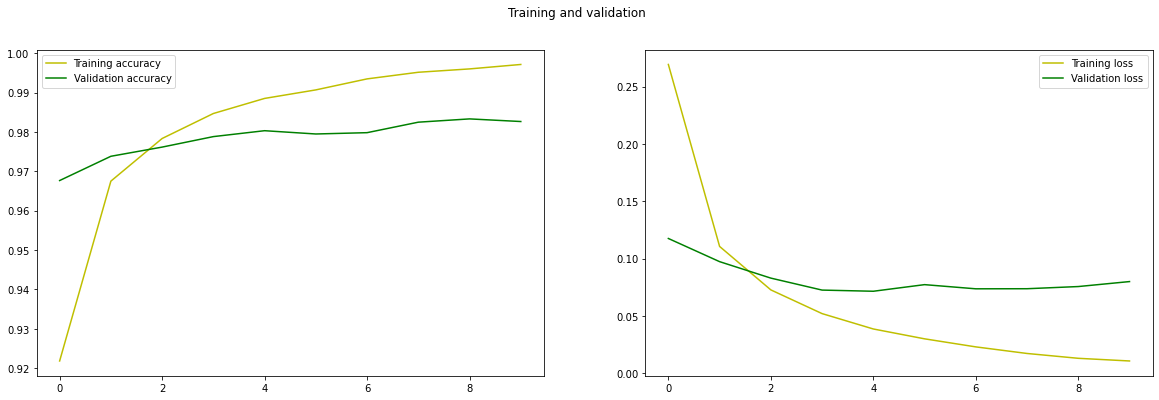

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [21]:
# Save model to be able to call later and predict without fitting
network.save('mnist.h5')
print('Model saved as:mnist.h5')

Model saved as:mnist.h5


In [22]:
a = network.predict(test_x)[0]

313/313 [==============================] - 1s 3ms/step


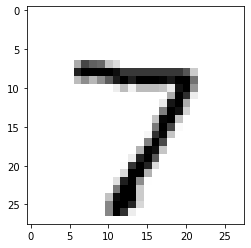

In [23]:
bn = test_x[0].reshape([28,28])
plt.imshow(bn,cmap = plt.cm.binary)

In [24]:
a.shape

(10,)

In [25]:
a

array([2.0959141e-11, 5.2383884e-13, 1.0401524e-07, 3.5118245e-07,
       1.9552158e-16, 2.5322425e-11, 4.8649122e-17, 9.9999940e-01,
       1.3644781e-10, 1.3038911e-07], dtype=float32)

In [26]:
import pandas as pd
pd.DataFrame(a)

,0
0,2.095914e-11
1,5.238388e-13
2,1.040152e-07
3,3.511825e-07
4,1.955216e-16
5,2.532242e-11
6,4.864912e-17
7,9.999994e-01
8,1.364478e-10
9,1.303891e-07


In [27]:
import numpy as np
print(np.max(a))
print(np.argmax(a))

0.9999994
7


In [28]:
r=test_x[0].reshape([28,28])

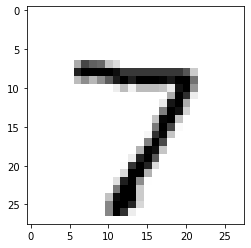

In [29]:
plt.imshow(r , cmap = plt.cm.binary)

# Evaluation on Custom Image

In [43]:
from skimage import io
img = io.imread('img_102.jpg', as_gray=True)

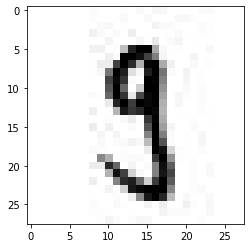

In [44]:
plt.imshow(img,cmap = plt.cm.binary)

In [45]:
img = (255 - img[:])/255

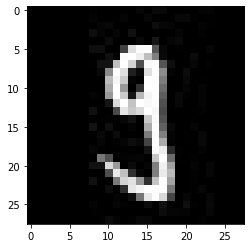

In [46]:
plt.imshow(img,cmap = plt.cm.binary)